In [1]:
from tensorflow.keras.applications.resnet50 import ResNet50, decode_predictions

In [2]:
resnet50 = ResNet50()
resnet50.summary()

102981632/102967424 [==============================] - 0s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                        

In [3]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

from google.colab import files
up = files.upload()

Saving 개.jpg to 개.jpg


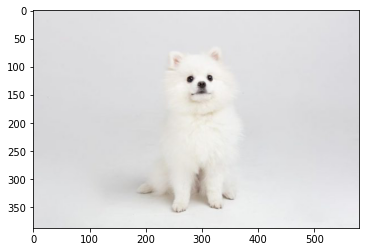

In [4]:
img = Image.open('개.jpg')
plt.imshow(img); #plt 대신 ; 넣어도 볼 수 있음 

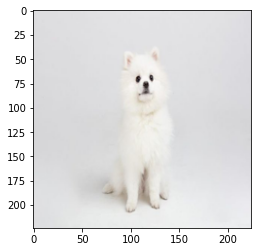

In [6]:
# ResNet50은 224x224x3 기준으로 이미지를 처리함
img = img.resize((224,224))
plt.imshow(img);

- 이미지 예측

In [9]:
# predict() 를 사용하려면 차원을 늘려주어야 함
img_array = np.array(img)
img_array.shape

(224, 224, 3)

In [11]:
yhat = resnet50.predict(img_array.reshape(1,224,224,3))
label = decode_predictions(yhat)
yhat.shape, label

49152/35363 [=========================================] - 0s 0us/step


((1, 1000),
 [[('n04286575', 'spotlight', 0.07529008),
   ('n06359193', 'web_site', 0.050390244),
   ('n02112018', 'Pomeranian', 0.03585133),
   ('n03532672', 'hook', 0.034292497),
   ('n03017168', 'chime', 0.033022944)]])

In [15]:
img_class = label[0][0][1]
prob = label[0][0][2]

In [16]:
img_class, prob

('spotlight', 0.07529008)